In [1]:
# importing requests package
import requests
from textblob import TextBlob
#api used is newsapi
# following query parameters are used
# source, sortBy and apiKey
query_params = {
"source": "the-hindu",
"sortBy": "top",
"apiKey": "995e7b64f86d428a9d15c33ca4d477a5"
}
main_url = " https://newsapi.org/v1/articles"



# fetching data in json format
res = requests.get(main_url, params=query_params)
open_the_hindu_page = res.json()
#print(open_bbc_page)
# getting all articles in a string article
article = open_the_hindu_page["articles"]
# empty list which will
# contain all trending news
results = [] #store the articles headlines
results_title_discription=[]   #store the description of it


for ar in article:
    results.append(ar["title"])
for ar_d in article:
    results_title_discription.append(ar_d["description"])


posi_senti=0
nega_senti=0
nutrl_senti=0
all_polarity_arry=[]
for i in range(len(results)):
        # printing all trending news
        print(i + 1, results[i])
        print('article description')
        print( results_title_discription[i])

        #sentimental analysis 

        analysis=TextBlob(results_title_discription[i])

        print(analysis.sentiment)
        
        if analysis.sentiment[0]>0:
            print('positive')
            posi_senti+=1
            all_polarity_arry.append(analysis.sentiment.polarity)

        elif analysis.sentiment[0]<0:
            print('negative')
            nega_senti+=1
            all_polarity_arry.append(analysis.sentiment.polarity)
        else:
            print('netural')
            nutrl_senti+=1
            all_polarity_arry.append(analysis.sentiment.polarity)



1 Hours after ouster as CBI chief, Alok Verma’s phone numbers made it to Pegasus list: Report
article description
“Also added to the list of numbers at the same time as Verma were two other senior CBI officials, Rakesh Asthana and A.K. Sharma...,” news portal The Wire claimed in a report.
Sentiment(polarity=-0.0625, subjectivity=0.25)
negative
2 Xi Jinping visits Tibet border region, first by Chinese leader in years
article description
He inspects newly opened and strategically important railway line
Sentiment(polarity=0.2681818181818182, subjectivity=0.7272727272727273)
positive
3 Six Ministers huddle with Yediyurappa, but say they will abide by party decision
article description
They had played a key role in bringing BJP to power
Sentiment(polarity=0.0, subjectivity=1.0)
netural
4 Parliament proceedings updates | Govt. to move motion seeking suspension of TMC MP today
article description
The proceedings of both the Houses of Parliament remained paralysed in the first four days of Mon

no of positive sentiments 4
no of positive sentiments 1
no of positive sentiments 5


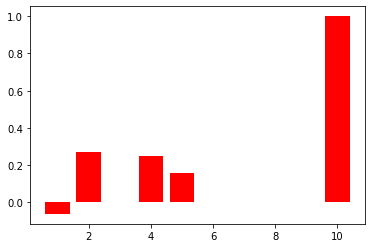

In [5]:
#ploting the aritcle vs its polarity

import numpy as np
import matplotlib.pyplot as plt

print('no of positive sentiments',posi_senti)
print('no of positive sentiments',nega_senti)
print('no of positive sentiments',nutrl_senti)

l=np.arange(1,len(results)+1)
plt.bar(l,all_polarity_arry,color='red')
plt.show()